In [2]:
import sys
import os
import subprocess

app_base_dir = '/home/spbproc/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import re
# import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import getpass
import matplotlib as mpl
import argparse
import glob
# from tqdm import tqdm
import traceback
import hashlib

from utility_funtions import str2bool_argparse

mpl.rcParams['figure.dpi'] = 80

import matplotlib.pyplot as plt

#import ROOT

# import tool.npy_frames_visualization as npy_vis
import tool.acqconv
from data_analysis_utils import *
from event_recognition_efficiency_v3 import *
# import supervised_classification as supc

/home/vrabel/EUSO-Balloon/vrabel/venv/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Welcome to JupyROOT 6.13/02


In [3]:
con = con = pg.connect(dbname='eusospb_data', user='eusospb', host='localhost', password='1e20eVjemeuso')
cur = con.cursor()

In [4]:
simu_signal_event_table='spb_processing_v3_simu_signal.event_uniq_3_1_10001'

In [86]:
simu_signals_all_query = '''
SELECT 
    {event_table_name}.*,
    
    proc1_x_y_hough_peak_thr1.major_line_phi AS proc1_x_y_hough_peak_thr1_major_line_phi, 
    proc1_gtu_x_hough_peak_thr1.major_line_phi AS proc1_gtu_x_hough_peak_thr1_major_line_phi, 
    proc1_gtu_y_hough_peak_thr1.major_line_phi AS proc1_gtu_y_hough_peak_thr1_major_line_phi,

    proc1_x_y_hough_peak_thr1.major_line_rho AS proc1_x_y_hough_peak_thr1_major_line_rho, 
    proc1_gtu_x_hough_peak_thr1.major_line_rho AS proc1_gtu_x_hough_peak_thr1_major_line_rho, 
    proc1_gtu_y_hough_peak_thr1.major_line_rho AS proc1_gtu_y_hough_peak_thr1_major_line_rho,
    
    proc1_x_y_hough_peak_thr2.major_line_phi AS proc1_x_y_hough_peak_thr2_major_line_phi, 
    proc1_gtu_x_hough_peak_thr2.major_line_phi AS proc1_gtu_x_hough_peak_thr2_major_line_phi, 
    proc1_gtu_y_hough_peak_thr2.major_line_phi AS proc1_gtu_y_hough_peak_thr2_major_line_phi,

    proc1_x_y_hough_peak_thr2.major_line_rho AS proc1_x_y_hough_peak_thr2_major_line_rho, 
    proc1_gtu_x_hough_peak_thr2.major_line_rho AS proc1_gtu_x_hough_peak_thr2_major_line_rho, 
    proc1_gtu_y_hough_peak_thr2.major_line_rho AS proc1_gtu_y_hough_peak_thr2_major_line_rho,
    
    proc1_x_y_hough_peak_thr3.major_line_phi AS proc1_x_y_hough_peak_thr3_major_line_phi, 
    proc1_gtu_x_hough_peak_thr3.major_line_phi AS proc1_gtu_x_hough_peak_thr3_major_line_phi, 
    proc1_gtu_y_hough_peak_thr3.major_line_phi AS proc1_gtu_y_hough_peak_thr3_major_line_phi,
    
    proc1_x_y_hough_peak_thr3.major_line_rho AS proc1_x_y_hough_peak_thr3_major_line_rho, 
    proc1_gtu_x_hough_peak_thr3.major_line_rho AS proc1_gtu_x_hough_peak_thr3_major_line_rho, 
    proc1_gtu_y_hough_peak_thr3.major_line_rho AS proc1_gtu_y_hough_peak_thr3_major_line_rho,
    
    proc1_x_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,

    
    proc1_x_y_hough_peak_thr1.line_clusters_max_size_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_size_clu_width,
    proc1_x_y_hough_peak_thr1.line_clusters_max_area_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_area_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_size_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_size_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_area_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_area_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_size_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_size_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_area_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_area_clu_width,
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_size_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_size_clu_width,
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_area_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_area_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_size_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_size_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_area_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_area_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_size_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_size_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_area_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_area_clu_width,
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_size_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_size_clu_width,
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_area_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_area_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_size_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_size_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_area_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_area_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_size_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_size_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_area_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_area_clu_width,



    proc1_x_y_hough_peak_thr1.line_clusters_count AS proc1_x_y_hough_peak_thr1_line_clusters_count, 
    proc1_x_y_hough_peak_thr2.line_clusters_count AS proc1_x_y_hough_peak_thr2_line_clusters_count, 
    proc1_x_y_hough_peak_thr3.line_clusters_count AS proc1_x_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_count AS proc1_gtu_y_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr2.line_clusters_count AS proc1_gtu_y_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr3.line_clusters_count AS proc1_gtu_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_count AS proc1_gtu_x_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr2.line_clusters_count AS proc1_gtu_x_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr3.line_clusters_count AS proc1_gtu_x_hough_peak_thr3_line_clusters_count, 
    
    proc1_x_y_clusters.count              AS proc1_x_y_clusters_count, 
    proc1_x_y_clusters.max_sum_clu_width  AS proc1_x_y_clusters_max_sum_clu_width, 
    proc1_x_y_clusters.max_sum_clu_height AS proc1_x_y_clusters_max_sum_clu_height,
    
    proc1_gtu_y_clusters.count              AS proc1_gtu_y_clusters_count, 
    proc1_gtu_y_clusters.max_sum_clu_width  AS proc1_gtu_y_clusters_max_sum_clu_width, 
    proc1_gtu_y_clusters.max_sum_clu_height AS proc1_gtu_y_clusters_max_sum_clu_height ,
    
    proc1_gtu_x_clusters.count              AS proc1_gtu_x_clusters_count, 
    proc1_gtu_x_clusters.max_sum_clu_width  AS proc1_gtu_x_clusters_max_sum_clu_width, 
    proc1_gtu_x_clusters.max_sum_clu_height AS proc1_gtu_x_clusters_max_sum_clu_height,
    
    orig_x_y.sum              AS orig_x_y_sum,
    orig_x_y.count_nonzero    AS orig_x_y_count_nonzero,
    orig_x_y.norm_sum         AS orig_x_y_norm_sum,
    orig_x_y.min              AS orig_x_y_min,
    orig_x_y.max              AS orig_x_y_max,
    orig_x_y.mean             AS orig_x_y_mean,
    orig_x_y.std              AS orig_x_y_std,
    orig_x_y.mean_gz          AS orig_x_y_mean_gz,
    orig_x_y.std_gz           AS orig_x_y_std_gz,

    --

    trg_x_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS trg_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    trg_x_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS trg_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    trg_x_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS trg_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
 
    trg_gtu_x_hough_peak_thr1.line_clusters_max_sum_clu_width AS trg_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,
    trg_gtu_x_hough_peak_thr2.line_clusters_max_sum_clu_width AS trg_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,
    trg_gtu_x_hough_peak_thr3.line_clusters_max_sum_clu_width AS trg_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,
 
    trg_gtu_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS trg_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    trg_gtu_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS trg_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    trg_gtu_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS trg_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width
 
/*
    --
    alt1_x_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS alt1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    alt1_x_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS alt1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    alt1_x_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS alt1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    alt1_x_y_hough_peak_thr4.line_clusters_max_sum_clu_width AS alt1_x_y_hough_peak_thr4_line_clusters_max_sum_clu_width,
    
    alt1_gtu_x_hough_peak_thr1.line_clusters_max_sum_clu_width AS alt1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,
    alt1_gtu_x_hough_peak_thr2.line_clusters_max_sum_clu_width AS alt1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,
    alt1_gtu_x_hough_peak_thr3.line_clusters_max_sum_clu_width AS alt1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,
    alt1_gtu_x_hough_peak_thr4.line_clusters_max_sum_clu_width AS alt1_gtu_x_hough_peak_thr4_line_clusters_max_sum_clu_width,

    alt1_gtu_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS alt1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    alt1_gtu_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS alt1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    alt1_gtu_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS alt1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    alt1_gtu_y_hough_peak_thr4.line_clusters_max_sum_clu_width AS alt1_gtu_y_hough_peak_thr4_line_clusters_max_sum_clu_width
*/


 FROM {event_table_name} 

 JOIN {schema_prefix}event_proc1_x_y_hough_peak_thr1 AS proc1_x_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_y_hough_peak_thr1 AS proc1_gtu_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_x_hough_peak_thr1 AS proc1_gtu_x_hough_peak_thr1 USING(event_id)

 JOIN {schema_prefix}event_proc1_x_y_hough_peak_thr2 AS proc1_x_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_y_hough_peak_thr2 AS proc1_gtu_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_x_hough_peak_thr2 AS proc1_gtu_x_hough_peak_thr2 USING(event_id)

 JOIN {schema_prefix}event_proc1_x_y_hough_peak_thr3 AS proc1_x_y_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_y_hough_peak_thr3 AS proc1_gtu_y_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_proc1_gtu_x_hough_peak_thr3 AS proc1_gtu_x_hough_peak_thr3 USING(event_id)

 JOIN {schema_prefix}event_proc1_x_y_clusters   AS proc1_x_y_clusters    USING (event_id)
 JOIN {schema_prefix}event_proc1_gtu_x_clusters AS proc1_gtu_x_clusters  USING (event_id)
 JOIN {schema_prefix}event_proc1_gtu_y_clusters AS proc1_gtu_y_clusters  USING (event_id)
 ---
 JOIN {schema_prefix}event_trg_x_y_hough_peak_thr1 AS trg_x_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_trg_x_y_hough_peak_thr2 AS trg_x_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_trg_x_y_hough_peak_thr3 AS trg_x_y_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_x_hough_peak_thr1 AS trg_gtu_x_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_x_hough_peak_thr2 AS trg_gtu_x_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_x_hough_peak_thr3 AS trg_gtu_x_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_y_hough_peak_thr1 AS trg_gtu_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_y_hough_peak_thr2 AS trg_gtu_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_trg_gtu_y_hough_peak_thr3 AS trg_gtu_y_hough_peak_thr3 USING(event_id)
 ---
 /*
 JOIN {schema_prefix}event_alt1_x_y_hough_peak_thr1 AS alt1_x_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_alt1_x_y_hough_peak_thr2 AS alt1_x_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_alt1_x_y_hough_peak_thr3 AS alt1_x_y_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_alt1_x_y_hough_peak_thr4 AS alt1_x_y_hough_peak_thr4 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_x_hough_peak_thr1 AS alt1_gtu_x_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_x_hough_peak_thr2 AS alt1_gtu_x_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_x_hough_peak_thr3 AS alt1_gtu_x_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_x_hough_peak_thr4 AS alt1_gtu_x_hough_peak_thr4 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_y_hough_peak_thr1 AS alt1_gtu_y_hough_peak_thr1 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_y_hough_peak_thr2 AS alt1_gtu_y_hough_peak_thr2 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_y_hough_peak_thr3 AS alt1_gtu_y_hough_peak_thr3 USING(event_id)
 JOIN {schema_prefix}event_alt1_gtu_y_hough_peak_thr4 AS alt1_gtu_y_hough_peak_thr4 USING(event_id) 
 */
 ---
 JOIN spb_processing_v3_simu_signal.event_orig_x_y AS orig_x_y  USING (event_id)
   
WHERE
    source_data_type_num = 10001
    
'''.format(schema_prefix='spb_processing_v3_simu_signal.', 
           event_table_name=simu_signal_event_table)


In [87]:
simu_signals_all_df = psql.read_sql(simu_signals_all_query, con)

In [88]:
len(simu_signals_all_df)

75461

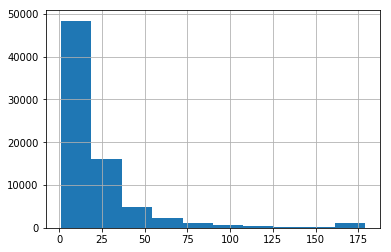

In [89]:
plt.close('all')
simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'].hist()
plt.show()

In [90]:
def draw_lines_legend(line_colors, line_names, show=True):
    lines = []
    tmp_lines_fig, tmp_lines_ax = plt.subplots(1);
    for line_color, line_name in zip(line_colors, line_names):
        lines.append(tmp_lines_ax.plot([0,1],[0,1],'-',color=line_color)[0])
    
    plt.clf()
    
    legend_fig, legend_ax  = plt.subplots(1)
    legend_ax.legend(lines, line_names, loc='center', fontsize='large', mode='expand')
    legend_ax.set_axis_off()
    legend_fig.set_size_inches(6,3);
    
    if show:
        plt.show()
    
    return legend_ax, legend_fig

In [135]:
# limited_max_peak_df = simu_signals_all_df[
#     ~ ( 
#         (
#             (simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#             (simu_signals_all_df['orig_x_y_max'] > 1) 
#         ) | \
#         (simu_signals_all_df['orig_x_y_max'] > 2) 
#     )
# ].sort_values(
#     ['orig_x_y_max','proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],ascending=[False, True,True])

# limited_max_peak_df = simu_signals_all_df[
#     (simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 50) & \
#     (simu_signals_all_df['orig_x_y_max'] > 1) 
# ].sort_values(
#     ['proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],ascending=[False,False])


limited_max_peak_df = simu_signals_all_df[
#     ((simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40) & (simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40)) | \
#     ((simu_signals_all_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40) & (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40)) | \
#     ((simu_signals_all_df['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40) & (simu_signals_all_df['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'] < 40)) #& \
    (simu_signals_all_df['orig_x_y_max'] > 2) & \
#     (simu_signals_all_df['trg_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width'] == 89)
    (simu_signals_all_df['proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width'] > 60) #& \
#     (simu_signals_all_df['proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width'] == 179)
    # 179 should be rerun
].sort_values(
    ['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width','proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width','proc1_x_y_clusters_count'],
#     ascending=[False,False,False]
    ascending=[True,True,True]
)

In [136]:
len(limited_max_peak_df)

1297

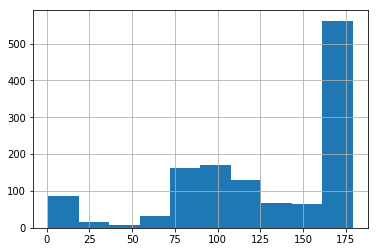

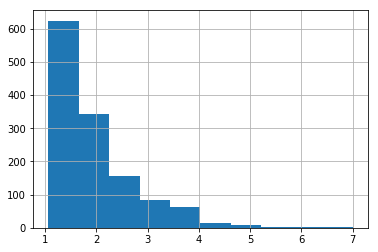

In [137]:
plt.close('all')
limited_max_peak_df['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'].hist()
plt.show()
limited_max_peak_df['orig_x_y_mean_gz'].hist()
plt.show()

In [138]:
_prev_max_columns = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', 500)
limited_max_peak_df

,event_id,config_info_id,program_version,timestamp,source_file_acquisition_full,source_file_trigger_full,source_file_acquisition,source_file_trigger,global_gtu,packet_id,gtu_in_packet,num_gtu,source_data_type_num,proc1_x_y_hough_peak_thr1_major_line_phi,proc1_gtu_x_hough_peak_thr1_major_line_phi,proc1_gtu_y_hough_peak_thr1_major_line_phi,proc1_x_y_hough_peak_thr1_major_line_rho,proc1_gtu_x_hough_peak_thr1_major_line_rho,proc1_gtu_y_hough_peak_thr1_major_line_rho,proc1_x_y_hough_peak_thr2_major_line_phi,proc1_gtu_x_hough_peak_thr2_major_line_phi,proc1_gtu_y_hough_peak_thr2_major_line_phi,proc1_x_y_hough_peak_thr2_major_line_rho,proc1_gtu_x_hough_peak_thr2_major_line_rho,proc1_gtu_y_hough_peak_thr2_major_line_rho,proc1_x_y_hough_peak_thr3_major_line_phi,proc1_gtu_x_hough_peak_thr3_major_line_phi,proc1_gtu_y_hough_peak_thr3_major_line_phi,proc1_x_y_hough_peak_thr3_major_line_rho,proc1_gtu_x_hough_peak_thr3_major_line_rho,proc1_gtu_y_hough_peak_thr3_major_line_rho,proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_size_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_area_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_size_clu_width,proc1_x_y_hough_peak_thr2_line_clusters_max_area_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_size_clu_width,proc1_x_y_hough_peak_thr3_line_clusters_max_area_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_size_clu_width,proc1_gtu_x_hough_peak_thr1_line_clusters_max_area_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_size_clu_width,proc1_gtu_x_hough_peak_thr2_line_clusters_max_area_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_size_clu_width,proc1_gtu_x_hough_peak_thr3_line_clusters_max_area_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_size_clu_width,proc1_gtu_y_hough_peak_thr1_line_clusters_max_area_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_size_clu_width,proc1_gtu_y_hough_peak_thr2_line_clusters_max_area_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_size_clu_width,proc1_gtu_y_hough_peak_thr3_line_clusters_max_area_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_count,proc1_x_y_hough_peak_thr2_line_clusters_count,proc1_x_y_hough_peak_thr3_line_clusters_count,proc1_gtu_y_hough_peak_thr1_line_clusters_count,proc1_gtu_y_hough_peak_thr2_line_clusters_count,proc1_gtu_y_hough_peak_thr3_line_clusters_count,proc1_gtu_x_hough_peak_thr1_line_clusters_count,proc1_gtu_x_hough_peak_thr2_line_clusters_count,proc1_gtu_x_hough_peak_thr3_line_clusters_count,proc1_x_y_clusters_count,proc1_x_y_clusters_max_sum_clu_width,proc1_x_y_clusters_max_sum_clu_height,proc1_gtu_y_clusters_count,proc1_gtu_y_clusters_max_sum_clu_width,proc1_gtu_y_clusters_max_sum_clu_height,proc1_gtu_x_clusters_count,proc1_gtu_x_clusters_max_sum_clu_width,proc1_gtu_x_clusters_max_sum_clu_height,orig_x_y_sum,orig_x_y_count_nonzero,orig_x_y_norm_sum,orig_x_y_min,orig_x_y_max,orig_x_y_mean,orig_x_y_std,orig_x_y_mean_gz,

In [139]:
pd.set_option('display.max_columns', _prev_max_columns)

In [140]:
vis_df = limited_max_peak_df.iloc[0:]
vis_df[['event_id',
        'proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width',
        
        'proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width', 
#         'proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width', 
#         'proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width',
#         'proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width', 
#         'proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width', 
#         'proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width'
       
        'proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 
#         'proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 
#         'proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width',
#         'proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 
#         'proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 
#         'proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width'
        
        'proc1_x_y_hough_peak_thr1_line_clusters_max_size_clu_width', 
#         'proc1_gtu_y_hough_peak_thr1_line_clusters_max_size_clu_width', 
#         'proc1_gtu_x_hough_peak_thr1_line_clusters_max_size_clu_width',
#         'proc1_x_y_hough_peak_thr2_line_clusters_max_size_clu_width', 
#         'proc1_gtu_y_hough_peak_thr2_line_clusters_max_size_clu_width', 
#         'proc1_gtu_x_hough_peak_thr2_line_clusters_max_size_clu_width',
        
        'proc1_x_y_hough_peak_thr1_line_clusters_max_area_clu_width', 
#         'proc1_gtu_y_hough_peak_thr1_line_clusters_max_area_clu_width', 
#         'proc1_gtu_x_hough_peak_thr1_line_clusters_max_area_clu_width',
#         'proc1_x_y_hough_peak_thr2_line_clusters_max_area_clu_width', 
#         'proc1_gtu_y_hough_peak_thr2_line_clusters_max_area_clu_width', 
#         'proc1_gtu_x_hough_peak_thr2_line_clusters_max_area_clu_width',
       ]]

,event_id,proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_size_clu_width,proc1_x_y_hough_peak_thr1_line_clusters_max_area_clu_width
67170,169684,76,1,102,102,102
71504,173490,90,1,120,120,120
16485,18985,71,1,81,81,81
72965,175768,76,1,123,123,123
69451,171938,78,1,158,158,158
74275,176709,61,1,91,91,91
64784,167266,71,1,111,111,111
66255,168928,99,1,140,140,140
75233,177336,85,1,113,113,113
21036,23282,66,1,91,91,91


In [141]:
pd.set_option('display.max_columns', _prev_max_columns)

/home/spbproc/SPBDATA_processed/spb_simu/posz_27000000.00/energy_6.31e+12/thousnd27E16/simu2npy/ev_11_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_27000000.00/energy_6.31e+12/thousnd27E16/simu2npy/ev_11_mc_1__signals.npy #0 i169684 (-4, 34)
len(event_frames)=23 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=23 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-06h34m09s/simu2npy/ev_8_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_6.85e+12/simu.2017-07-22-06h34m09s/simu2npy/ev_8_mc_1__signals.npy #1 i173490 (-4, 34)
len(event_frames)=20 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=20 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_30000000.00/energy_3.16e+12/thousnd30E10.2017-07-25-05h05m17s/simu2npy/ev_80_mc_1__signals.npy /home/spbproc/SPB

/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_4.00e+12/simu.2017-07-04-15h16m02s/simu2npy/ev_82_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_4.00e+12/simu.2017-07-04-15h16m02s/simu2npy/ev_82_mc_1__signals.npy #20 i42809 (-4, 34)
len(event_frames)=23 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=23 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_33000000.00/energy_7.08e+12/thousnd33E17.2017-07-26-09h41m44s/simu2npy/ev_77_mc_1__signals.npy /home/spbproc/SPBDATA_processed/spb_simu/posz_33000000.00/energy_7.08e+12/thousnd33E17.2017-07-26-09h41m44s/simu2npy/ev_77_mc_1__signals.npy #21 i176972 (-4, 34)
len(event_frames)=10 n_event_frames_count=38 n_event_frames.shape=(38, 48, 48) n_event_frames_offset=4 event_frames_sec_len=10 event_frames_offset=0
/home/spbproc/SPBDATA_processed/spb_simu/posz_24000000.00/energy_2.82e+12/thousnd24E9.2017-07-25-22h06m41s/simu2n

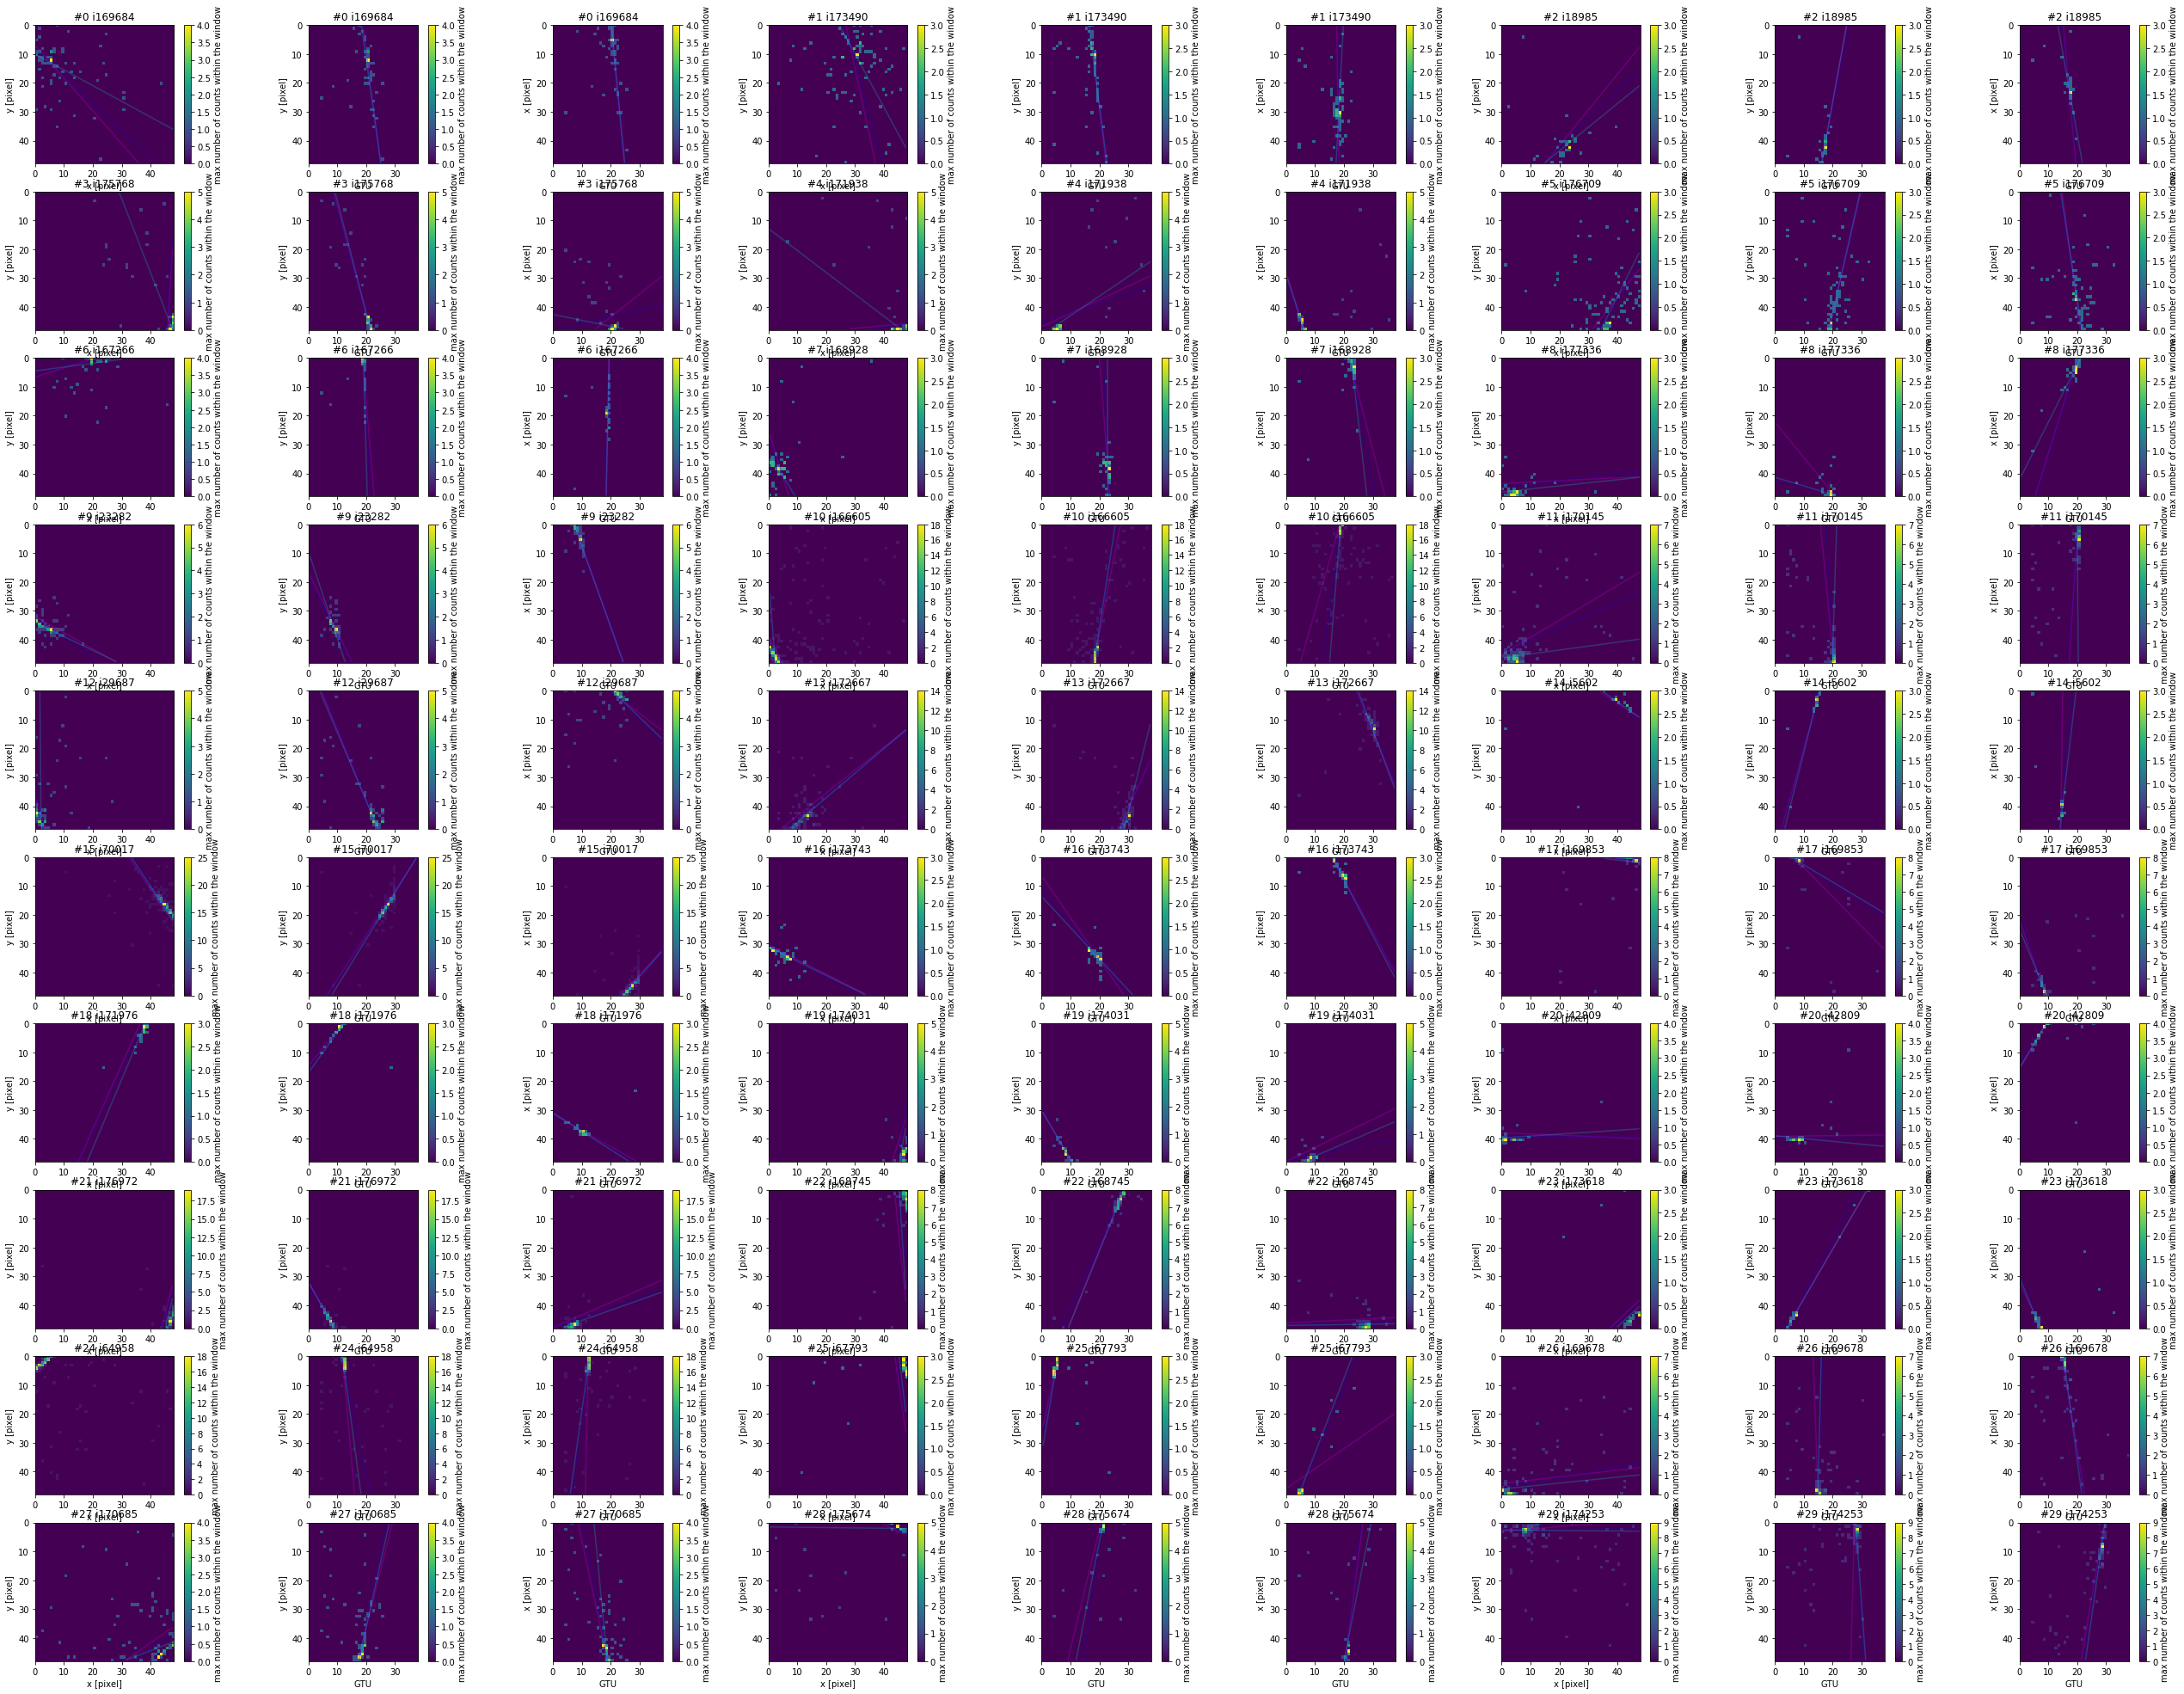

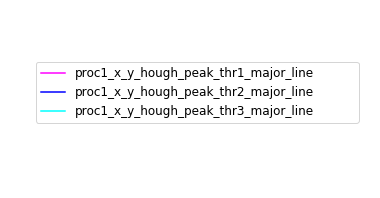

(<matplotlib.axes._subplots.AxesSubplot at 0x7f21e3477278>,
 <matplotlib.figure.Figure at 0x7f21d0e60320>)

In [142]:
vis_events_line_colors = ['#FF00FF','#0000FF','#00FFFF','#80FF00','#FF8000','#FF0000','yellow']
vis_events_line_columns_x_y = [('proc1_x_y_hough_peak_thr1_major_line_rho','proc1_x_y_hough_peak_thr1_major_line_phi'),('proc1_x_y_hough_peak_thr2_major_line_rho','proc1_x_y_hough_peak_thr2_major_line_phi'),('proc1_x_y_hough_peak_thr3_major_line_rho','proc1_x_y_hough_peak_thr3_major_line_phi')] 
vis_events_line_columns_gtu_x = [('proc1_gtu_x_hough_peak_thr1_major_line_rho','proc1_gtu_x_hough_peak_thr1_major_line_phi'),('proc1_gtu_x_hough_peak_thr2_major_line_rho','proc1_gtu_x_hough_peak_thr2_major_line_phi'),('proc1_gtu_x_hough_peak_thr3_major_line_rho','proc1_gtu_x_hough_peak_thr3_major_line_phi')] 
vis_events_line_columns_gtu_y = [('proc1_gtu_y_hough_peak_thr1_major_line_rho','proc1_gtu_y_hough_peak_thr1_major_line_phi'),('proc1_gtu_y_hough_peak_thr2_major_line_rho','proc1_gtu_y_hough_peak_thr2_major_line_phi'),('proc1_gtu_y_hough_peak_thr3_major_line_rho','proc1_gtu_y_hough_peak_thr3_major_line_phi')] 


# vis_events_df(vis_df, events_per_figure=50, max_figures=1, vis_gtux=True, vis_gtuy=True, close_after_vis=False, show=True, 
#               line_columns_x_y=vis_events_line_columns_x_y, 
#               line_columns_gtu_x=vis_events_line_columns_gtu_x, 
#               line_columns_gtu_y=vis_events_line_columns_gtu_y,
#              line_colors=vis_events_line_colors, line_alpha=0.3)

plt.close('all')

fig, axs = plt.subplots(10, 9)
fig.set_size_inches(9*5,7*5)
axs_flattened = axs.flatten()
ai = 0

for i,(rid,r) in enumerate(vis_df.iterrows()):
    simu_gtu_start = r['gtu_in_packet']-4-30
    simu_gtu_end = simu_gtu_start+r['num_gtu']
    
    lines_xy = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_x_y]
    lines_gtux = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_gtu_x]
    lines_gtuy = [(r[l[0]],r[l[1]]) for l in vis_events_line_columns_gtu_y]
    
    if ai+2 >= len(axs_flattened):
        break
    
    print( r['source_file_acquisition_full'], r['source_file_acquisition_full'], "#{} i{}".format(i, r['event_id']), (simu_gtu_start,simu_gtu_end) )
    visualize_simu_event_projections(r['source_file_acquisition_full'], title="#{} i{}".format(i, r['event_id']), axs_flattened=axs_flattened, 
                                    lines_xy=lines_xy, lines_gtux=lines_gtux, lines_gtuy=lines_gtuy, line_colors=vis_events_line_colors, line_alpha=.2, vis_xy=True, vis_gtux=True, vis_gtuy=True, ai=ai,
                                    gtu_range=(simu_gtu_start, simu_gtu_end), get_simunpy_func=lambda acq: acq)
    ai += 3
    
    if ai >= len(axs_flattened):
        break

vis_events_line_names = [os.path.commonprefix([col_rho,col_phi])[:-1] for col_rho, col_phi in vis_events_line_columns_x_y]
draw_lines_legend(vis_events_line_colors, vis_events_line_names)

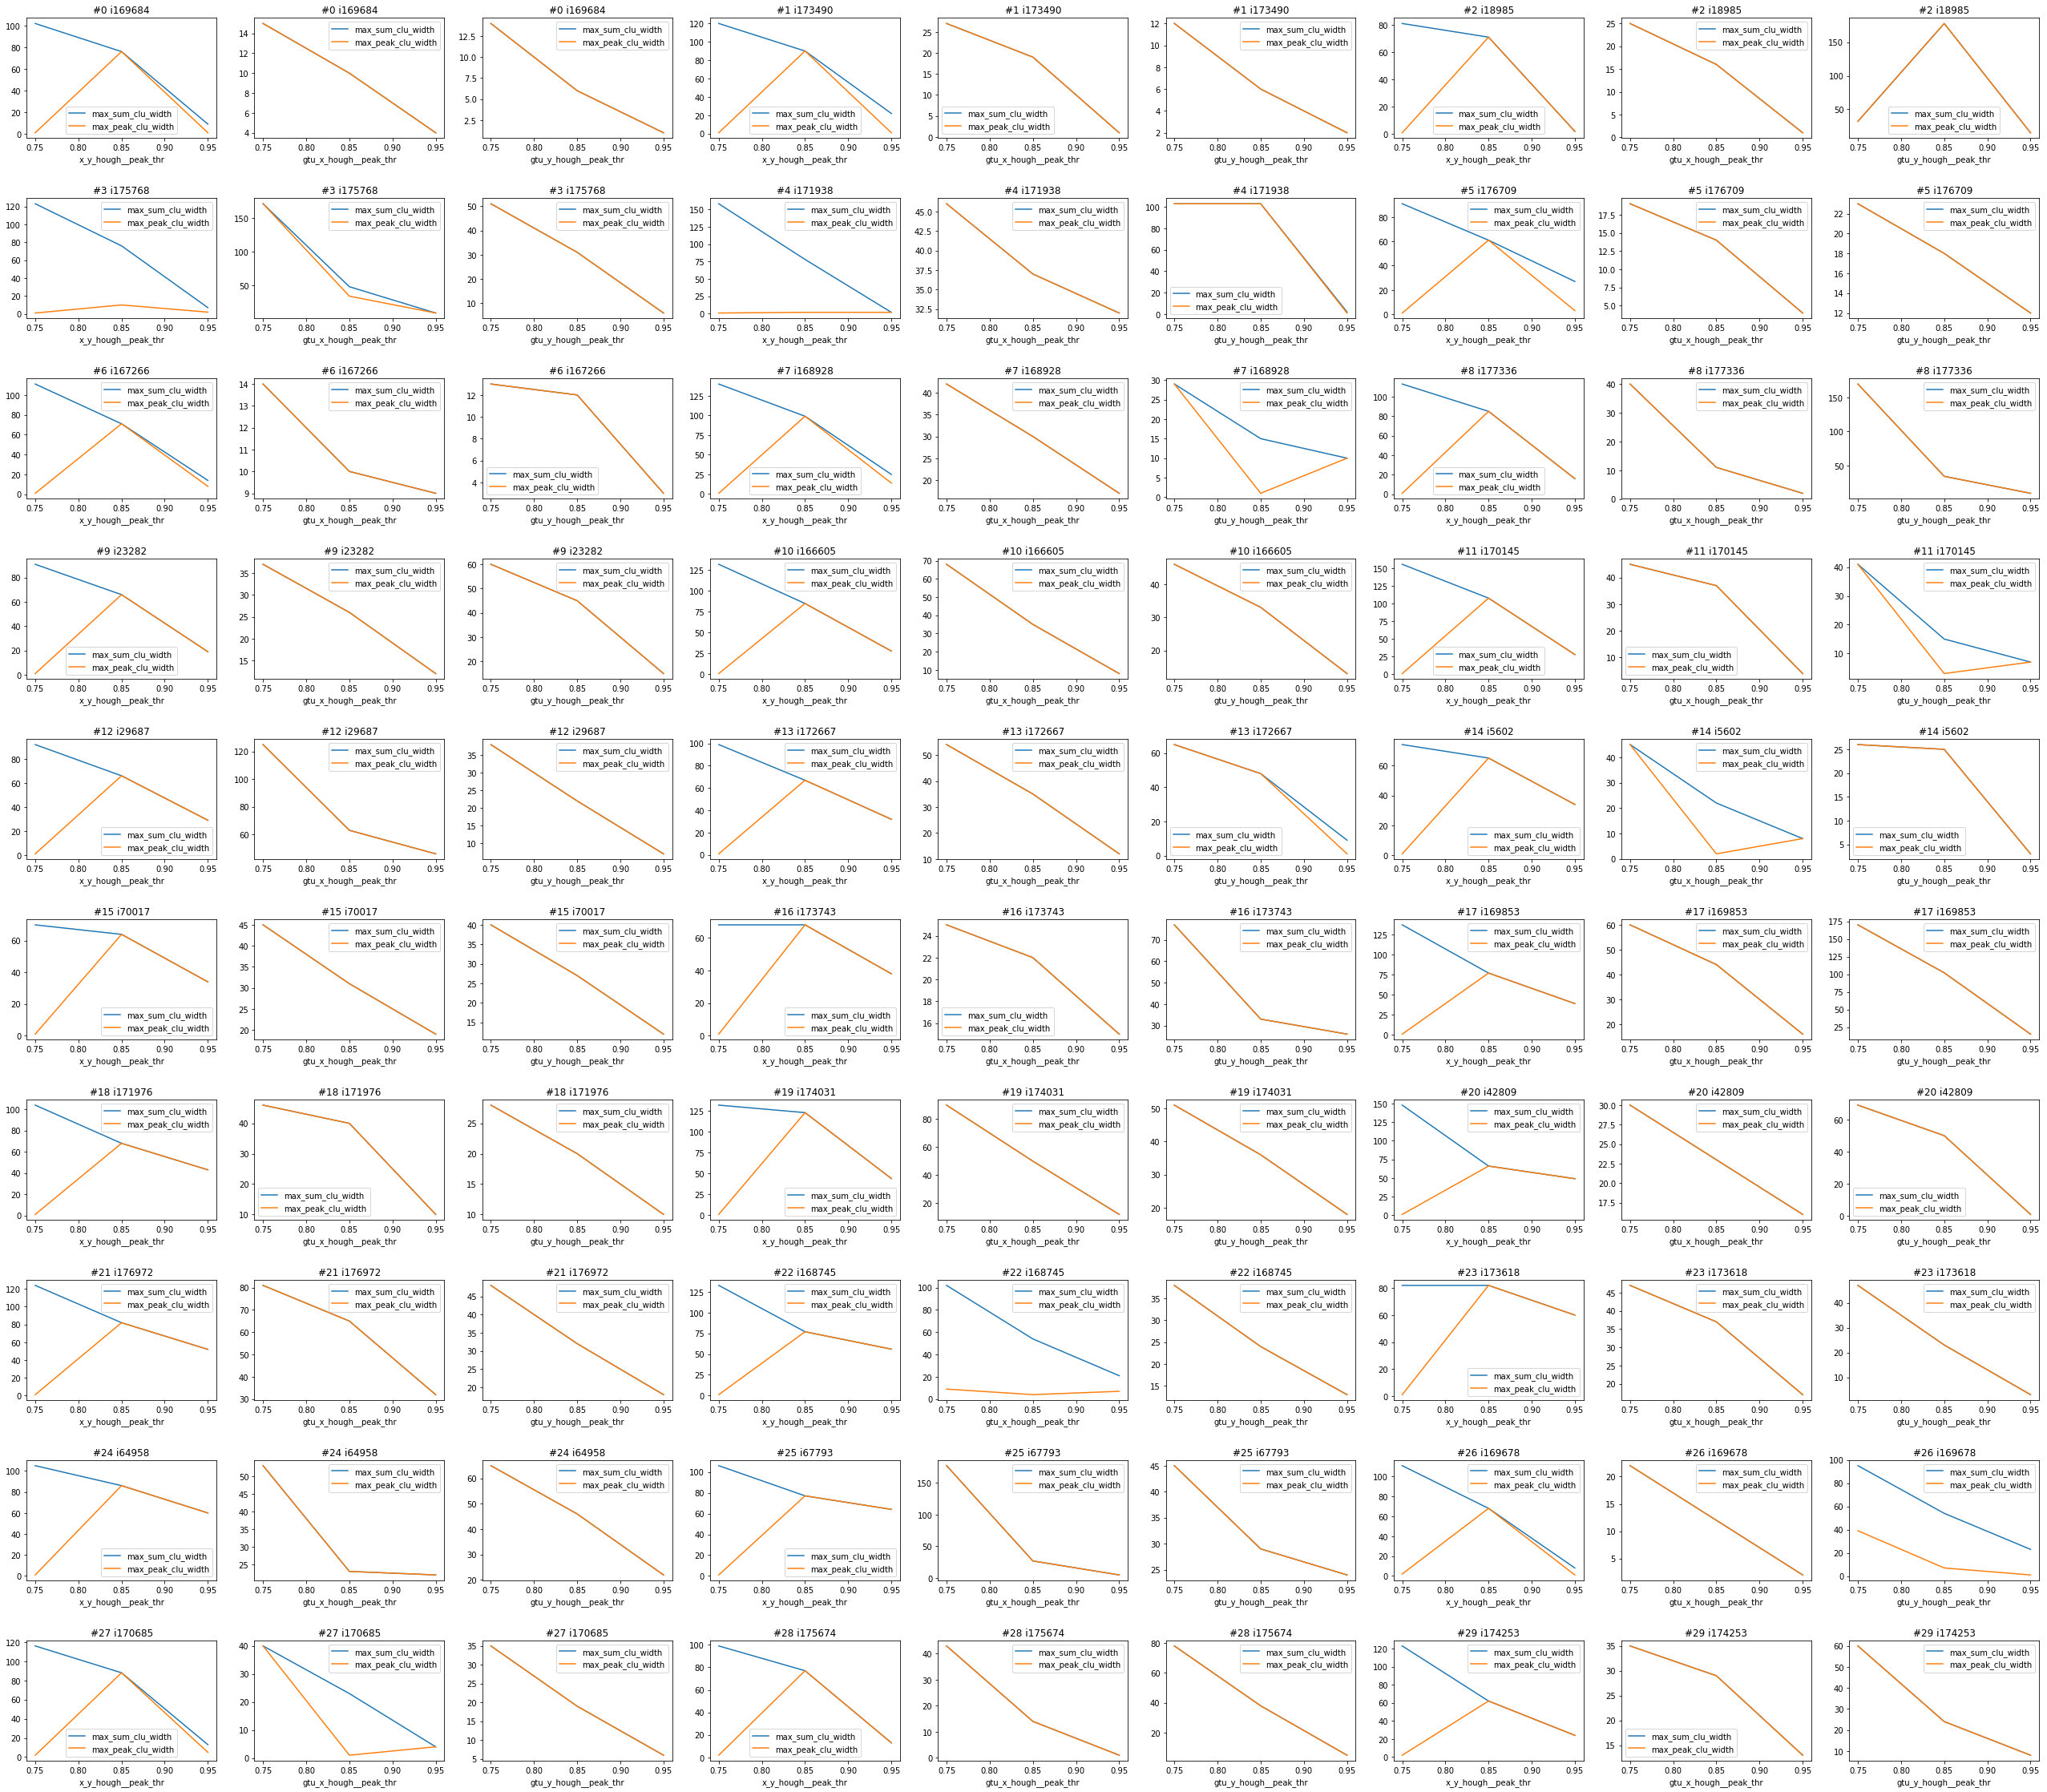

In [143]:
plt.close('all')

fig, axs = plt.subplots(10, 9)
fig.set_size_inches(9*5,8*5)
axs_flattened = axs.flatten()
ai = 0

fig.subplots_adjust(wspace=.2, hspace=.5)

for i,(rid,r) in enumerate(vis_df.iterrows()):
    simu_gtu_start = r['gtu_in_packet']-4-30
    simu_gtu_end = simu_gtu_start+r['num_gtu']
    
    if ai+2 >= len(axs_flattened):
        break
    
    # x_y_hough__peak_thr
    axs_flattened[ai].set_title("#{} i{}".format(i,r['event_id']))
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width'],
         r['proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width'],
         r['proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width']]
    )
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width'],
         r['proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width'],
         r['proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width']]
    )
    axs_flattened[ai].set_xlabel("x_y_hough__peak_thr")
    axs_flattened[ai].legend(('max_sum_clu_width','max_peak_clu_width'))
    ai += 1
    
    # gtu_x_hough__peak_thr
    axs_flattened[ai].set_title("#{} i{}".format(i,r['event_id']))
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width'],
         r['proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width'],
         r['proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width']]
    )
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width'],
         r['proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width'],
         r['proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width']]
    )
    axs_flattened[ai].set_xlabel("gtu_x_hough__peak_thr")
    axs_flattened[ai].legend(('max_sum_clu_width','max_peak_clu_width'))
    ai += 1
    
    # gtu_y_hough__peak_thr
    axs_flattened[ai].set_title("#{} i{}".format(i,r['event_id']))
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width'],
         r['proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width'],
         r['proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width']]
    )
    axs_flattened[ai].plot(
        [0.75, 0.85, 0.95],
        [r['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width'],
         r['proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width'],
         r['proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width']]
    )
    axs_flattened[ai].set_xlabel("gtu_y_hough__peak_thr")
    axs_flattened[ai].legend(('max_sum_clu_width','max_peak_clu_width'))
    ai += 1
    
    if ai >= len(axs_flattened):
        break

# trg_x_y_hough__peak_thr = .60;.75;.90
# trg_gtu_x_hough__peak_thr = .60;.75;.90
# trg_gtu_y_hough__peak_thr = .60;.75;.90

plt.show()

In [108]:
ev_to_analyse = simu_signals_all_df[simu_signals_all_df['event_id']==70017].iloc[0] # 65066, 10010 , 66972

In [109]:
ev_to_analyse.to_dict()

{'config_info_id': 1,
 'event_id': 70017,
 'global_gtu': 30,
 'gtu_in_packet': 30,
 'num_gtu': 38,
 'orig_x_y_count_nonzero': 78,
 'orig_x_y_max': 25,
 'orig_x_y_mean': 0.0954861,
 'orig_x_y_mean_gz': 2.82051,
 'orig_x_y_min': 0,
 'orig_x_y_norm_sum': 8.8,
 'orig_x_y_std': 0.945336,
 'orig_x_y_std_gz': 4.32566,
 'orig_x_y_sum': 220,
 'packet_id': 0,
 'proc1_gtu_x_clusters_count': 2,
 'proc1_gtu_x_clusters_max_sum_clu_height': 23,
 'proc1_gtu_x_clusters_max_sum_clu_width': 22,
 'proc1_gtu_x_hough_peak_thr1_line_clusters_count': 1,
 'proc1_gtu_x_hough_peak_thr1_line_clusters_max_area_clu_width': 45,
 'proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width': 45,
 'proc1_gtu_x_hough_peak_thr1_line_clusters_max_size_clu_width': 45,
 'proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width': 45,
 'proc1_gtu_x_hough_peak_thr1_major_line_phi': 0.751246,
 'proc1_gtu_x_hough_peak_thr1_major_line_rho': 49.0189,
 'proc1_gtu_x_hough_peak_thr2_line_clusters_count': 1,
 'proc1_gtu_x_hough_p